In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Parth\ML - Project - 2\training.1600000.processed.noemoticon.csv\training.1600000.processed.noemoticon.csv", encoding='latin')
df.columns = ['target', 'tweet_id', 'time', 'flag', 'user', 'text']
df.head()

,target,tweet_id,time,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
features ='text'
target = 'target'

df = df[[features, target]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1599999 non-null  object
 1   target  1599999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [6]:
df['target'] = pd.to_numeric(df['target'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1599999 non-null  object
 1   target  1599999 non-null  int8  
dtypes: int8(1), object(1)
memory usage: 13.7+ MB


In [7]:
df['target'] = df['target'].replace(4, 1)
df['target'].value_counts()

1    800000
0    799999
Name: target, dtype: int64

In [8]:
df['text'] = df['text'].apply(lambda x: re.sub('@[^\s]+','',x))

# take out the links
df["text"] = df["text"].apply(lambda x: re.sub(r"http\S+", "", x))

# take out the hashtags
df["text"] = df["text"].apply(lambda x: re.sub(r"#\S+", "", x))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1599999 non-null  object
 1   target  1599999 non-null  int8  
dtypes: int8(1), object(1)
memory usage: 13.7+ MB


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], 
                                                    df["target"], 
                                                    test_size=0.2, 
                                                    random_state=42)

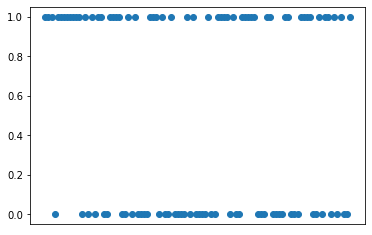

In [29]:
plt.xticks([])
plt.scatter(X_train.head(100),y_train.head(100))

In [30]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [31]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.798925

In [32]:
print("F1 Score: ", f1_score(y_test, lr.predict(X_test)))
print('Accuracy: ', accuracy_score(y_test, lr.predict(X_test)), "\n")
print(classification_report(y_test, lr.predict(X_test)))
print('Confusion Matrix:\n', confusion_matrix(y_test, lr.predict(X_test)))

F1 Score:  0.8017842620203564
Accuracy:  0.798925 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Confusion Matrix:
 [[125520  33974]
 [ 30370 130136]]


In [33]:
predict = lambda x: lr.predict(vectorizer.transform([x]))
sentiment  = lambda x: 'positive' if predict(x) == 1 else 'negative'

In [34]:
tweet = "I love this movie"
sentiment(tweet)

'positive'

In [35]:
coefficients = pd.DataFrame(lr.coef_, columns=vectorizer.get_feature_names()).T
coefficients.columns = ['coefficients']
coefficients['abs'] = coefficients['coefficients'].apply(lambda x: abs(x))
coefficients.sort_values(by='abs', ascending=False).head(10)

,coefficients,abs
sad,-13.205165,13.205165
miss,-9.310025,9.310025
missing,-8.024451,8.024451
poor,-7.698998,7.698998
sucks,-7.597514,7.597514
sadly,-7.544230,7.544230
died,-7.250903,7.250903
unfortunately,-7.187918,7.187918
sick,-7.159144,7.159144
disappointed,-6.484442,6.484442


In [36]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [37]:
def model_train(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred_tr = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("--------------------Training Performance---------------------")
    print(classification_report(y_train,y_pred_tr))
    print("-------------------------------------------------------------")
    print("--------------------Testing Performance----------------------")
    print(classification_report(y_test,y_pred))
    
    print('Accuracy: ', accuracy_score(y_test, model.predict(X_test)), "\n")
    
    sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.4g',
            xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
    plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc=4)
    plt.show()

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.81    640505
           1       0.82      0.79      0.80    639494

    accuracy                           0.81   1279999
   macro avg       0.81      0.81      0.81   1279999
weighted avg       0.81      0.81      0.81   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.78    159494
           1       0.79      0.75      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Accuracy:  0.773221875 



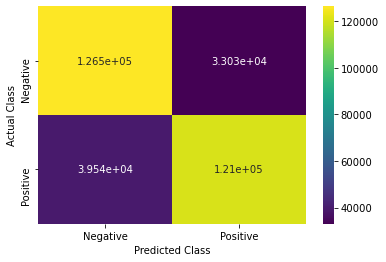

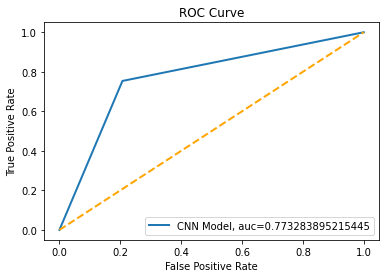

In [38]:
#Naive Bias
model = MultinomialNB()
model_train(model, X_train, X_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.82      0.81      0.81    640505
           1       0.81      0.83      0.82    639494

    accuracy                           0.82   1279999
   macro avg       0.82      0.82      0.82   1279999
weighted avg       0.82      0.82      0.82   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Accuracy:  0.799390625 



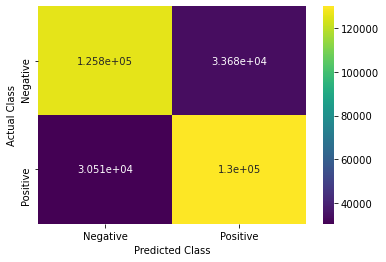

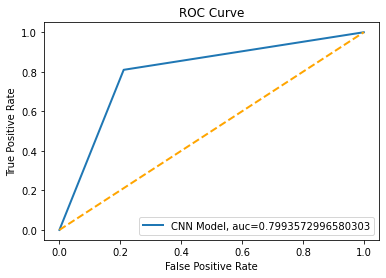

In [39]:
model = LogisticRegression(max_iter=1000)
model_train(model, X_train, X_test, y_train, y_test)

--------------------Training Performance---------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.74    640505
           1       0.73      0.76      0.74    639494

    accuracy                           0.74   1279999
   macro avg       0.74      0.74      0.74   1279999
weighted avg       0.74      0.74      0.74   1279999

-------------------------------------------------------------
--------------------Testing Performance----------------------
              precision    recall  f1-score   support

           0       0.74      0.72      0.73    159494
           1       0.73      0.75      0.74    160506

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000

Accuracy:  0.735321875 



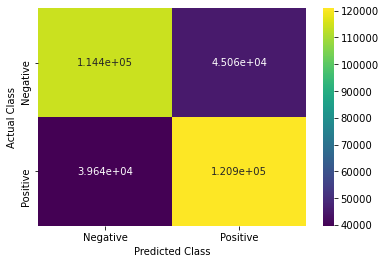

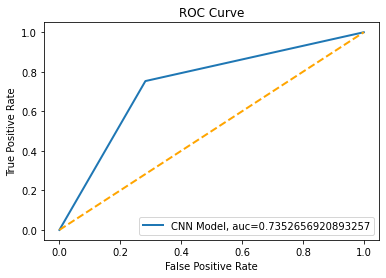

In [40]:
model = RandomForestClassifier(n_estimators=100,max_depth=15,max_features='sqrt')
model_train(model, X_train, X_test, y_train, y_test)

In [43]:
from sklearn.svm import SVC 

In [ ]:
model = SVC(kernel='linear') 
model_train(model, X_train, X_test, y_train, y_test)